In [18]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint

In [19]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

In [20]:
data_path = os.path.join("..", "data", "wine.csv")
df_pre = pd.read_csv(data_path, header = None)
df = df_pre.sample(frac = 0.15)

In [21]:
dataset = df.values
X = dataset[:, 0:12]
Y = dataset[:, 12]

In [22]:
model = Sequential()
model.add(Dense(30, input_dim= 12, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [23]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])


In [24]:
history = model.fit(X, Y, validation_split = 0.2, epochs = 2000, batch_size = 200)

Epoch 1/3500
2/2 [==============================] - 1s 211ms/step - loss: 1.2183 - accuracy: 0.1730 - val_loss: 0.6505 - val_accuracy: 0.6522
Epoch 2/3500
2/2 [==============================] - 0s 57ms/step - loss: 0.6617 - accuracy: 0.6126 - val_loss: 0.4471 - val_accuracy: 0.7671
Epoch 3/3500
2/2 [==============================] - 0s 55ms/step - loss: 0.4773 - accuracy: 0.7335 - val_loss: 0.4015 - val_accuracy: 0.7795
Epoch 4/3500
2/2 [==============================] - 0s 57ms/step - loss: 0.4363 - accuracy: 0.7611 - val_loss: 0.3908 - val_accuracy: 0.7826
Epoch 5/3500
2/2 [==============================] - 0s 74ms/step - loss: 0.4253 - accuracy: 0.7611 - val_loss: 0.3894 - val_accuracy: 0.7826
Epoch 6/3500
2/2 [==============================] - 0s 76ms/step - loss: 0.4251 - accuracy: 0.7611 - val_loss: 0.3910 - val_accuracy: 0.7826
Epoch 7/3500
2/2 [==============================] - 0s 76ms/step - loss: 0.4269 - accuracy: 0.7611 - val_loss: 0.3927 - val_accuracy: 0.7826
Epoch 8/3500

In [42]:
y_loss = history.history['loss']
y_vloss = history.history['val_loss']
y_acc = history.history['accuracy']
y_vacc = history.history['val_accuracy']

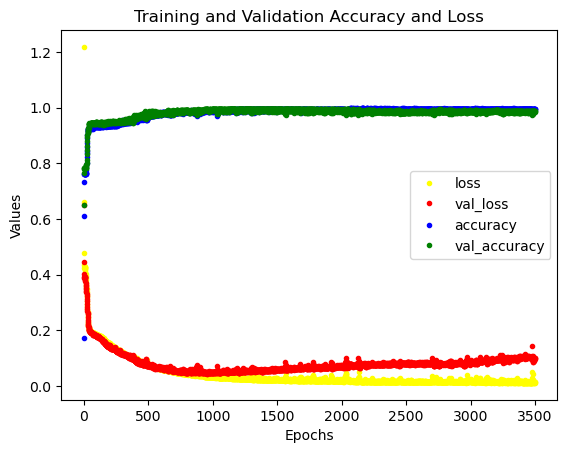

In [43]:
x_len = np.arange(len(y_acc))

plt.plot(x_len, y_loss, "o", c = "yellow", markersize = 3, label = 'loss')
plt.plot(x_len, y_vloss, "o", c = "red", markersize = 3, label = 'val_loss')
plt.plot(x_len, y_acc, "o", c = "blue", markersize = 3, label = 'accuracy')
plt.plot(x_len, y_vacc, "o", c = "green", markersize = 3, label = 'val_accuracy')

plt.title('Training and Validation Accuracy and Loss')
plt.xlabel('Epochs')
plt.ylabel('Values')
plt.legend()
plt.show()